In [43]:
#tshark -r alis_capture.pcapng -T fields -e udp.payload -Y udp.srcport==12345 > fromserver.txt
#tshark -r alis_capture.pcapng -T fields -e udp.payload -Y udp.dstport==12345 > fromclient.txt
#tshark -r alis_capture.pcapng -T fields -e udp.srcport -e udp.dstport -e udp.payload > alltraffic.txt

filespath="~/Desktop/isccph/capture/"

import pandas as pd
df = pd.read_csv(filespath+"alltraffic.txt", sep="\t", names=["srcport","dstport","payload"])

df.style.set_properties(**{'text-align': 'left'})

,srcport,dstport,payload
0,49371,12345,9dd9017a7e0ce62767
1,12345,49371,9dd901
2,49371,12345,9dd9023a7f0ce62767
3,12345,49371,9dd9ffffffffffffffff0000000000000000000000000000000000000000000000000000000000000000efcdab9078563412000000000000000000000000000000000000000000000000dec0edfefecaad0b
4,49371,12345,9dd903000509ffffffffffffffffffffffffffffffefcdab9078563412dec0edfefecaad0bf7290ce62767
5,12345,49371,9dd903
6,49371,12345,9dd9023a7f0ce62767
7,12345,49371,9dd9ffffffffffffffff0000000000000000000000000000000000000000000000000000000000000000efcdab9078563412000000000000000000000000000000000000000000000000dec0edfefecaad0b
8,49371,12345,9dd904ba7d0ce62767
9,12345,49371,9dd956657273696f6e3a20312e302c2052756e6e696e673a2054727565


In [44]:
#Length clustering
dfserver=pd.read_csv(filespath+"fromserver.txt", names=["payload"])

dfserver=dfserver.sort_values(by="payload", key=lambda x: x.str.len())

dfserver.style.set_properties(**{'text-align': 'left'})

,payload
0,9dd901
2,9dd903
6,3c8801
5,9dd9fa
12,ab2c01
14,ab2c03
11,3c8805
8,3c8803
17,ab2cfa
4,9dd956657273696f6e3a20312e302c2052756e6e696e673a2054727565


In [45]:
#Let's make some observations
#First 2 bytes seems to static when a single ephemeral UDP port used, so it could be a session idenfier
#Client messages are differ from responder / server messages
#Client messages has 3 static bytes and of them, fourth byte changes time to time

dfclient=pd.read_csv(filespath+"fromclient.txt", names=["payload"])

dfclient=dfclient.sort_values(by="payload", key=lambda x: x.str.len())

dfclient.style.set_properties(**{'text-align': 'left'})

,payload
0,9dd9017a7e0ce62767
1,9dd9023a7f0ce62767
3,9dd9023a7f0ce62767
4,9dd904ba7d0ce62767
6,3c8801160c19e62767
5,9dd9057bbd0ce62767
7,3c8802560d19e62767
9,3c8802560d19e62767
15,ab2c029d212be62767
10,3c8804d60f19e62767


[18, 86]
There is 3 samples


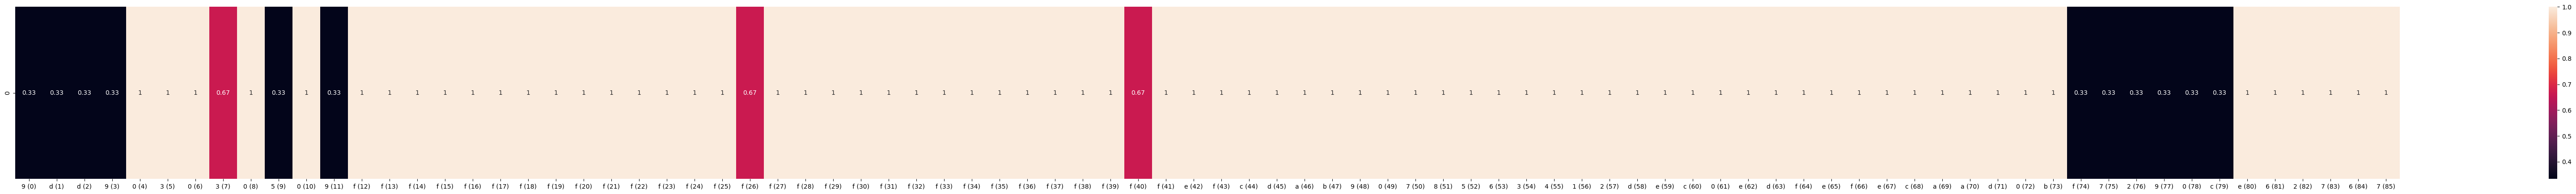

In [46]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

candidate_payloads=None
length_set=set()

with open("/home/lotus/Desktop/isccph/capture/fromclient.txt") as f: #set this to an ASCII encoded hex payload output
    candidate_payloads=f.read().splitlines()

for s in candidate_payloads:
    length_set.add(len(s))

ls_list=list(length_set)
ls_list.sort()

print(ls_list)

def get_heatmap(hexstrings,length):
    index_counts = []
    for tmp in range(length):
        index_counts.append({}) #create empty dicts to fill

    for string in hexstrings:
        for index in range(len(string)):
            nibble = string[index]
            
            if nibble in index_counts[index]:
                index_counts[index][nibble] += 1
            else:
                index_counts[index][nibble] = 1


    cols=[]
    fuzzy=[]

    for index in range(length):
        often=max(index_counts[index], key=index_counts[index].get, default=None)
        cols.append(often+" ("+str(index)+")")
        fuzzy.append(index_counts[index][often] / len(hexstrings))

    prob_matrix = pd.DataFrame([fuzzy],columns=cols,index=[0])
    prob_matrix = prob_matrix.iloc[:,:shown]
    plt.figure(figsize=(shown, 5)) 
    sb.heatmap(prob_matrix, annot=True)



shown=86 #change this with a valid value (valid values displayed in script output)
strings=[]


for candidate in candidate_payloads:
    if len(candidate)==shown:
        strings.append(candidate)

print("There is "+str(len(strings))+" samples")

get_heatmap(strings,shown)